In [47]:
import tqdm
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import svm
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
df = pd.read_csv('../data/preprocessed.csv')

In [43]:
df[:5]

,page_name,contributors_count_ar,contributors_count_avg_all_period,contributors_count_avg_last_month,contributors_count_avg_last_week,contributors_count_count_records,contributors_count_max,contributors_count_mean,contributors_count_min,contributors_count_std,revisions_count_ar,revisions_count_avg_all_period,revisions_count_avg_last_month,revisions_count_avg_last_week,revisions_count_count_records,revisions_count_max,revisions_count_mean,revisions_count_min,revisions_count_std
0,Himantolophus_borealis,0.0,1.0,1.0,1.0,40,1,1.0,1,0.0,0.0,5.0,5.0,5.0,40,5,5.0,5,0.0
1,Himantolophus_brevirostris,0.0,2.0,2.0,2.0,40,2,2.0,2,0.0,0.0,6.0,6.0,6.0,40,6,6.0,6,0.0
2,Himantolophus_compressus,0.0,3.0,3.0,3.0,40,3,3.0,3,0.0,0.0,7.0,7.0,7.0,40,7,7.0,7,0.0
3,Himantolophus_cornifer,0.0,2.0,2.0,2.0,40,2,2.0,2,0.0,0.0,9.0,9.0,9.0,40,9,9.0,9,0.0
4,Himantolophus_crinitus,0.0,2.0,2.0,2.0,40,2,2.0,2,0.0,0.0,4.0,4.0,4.0,40,4,4.0,4,0.0


/home/hanna/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=40.0, right=40.0
  'left=%s, right=%s') % (left, right))
/home/hanna/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=40.0, top=40.0
  'bottom=%s, top=%s') % (bottom, top))


LinAlgError: singular matrix

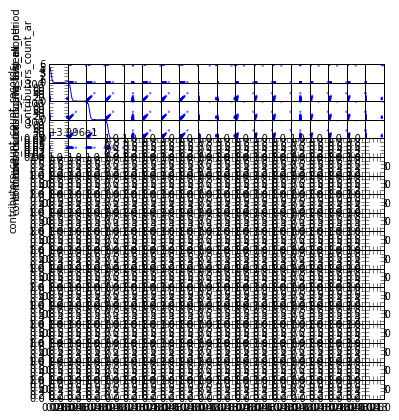

In [48]:
# plt.figure
# plt.matshow(df[1:].corr())
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [27]:
df = np.array(df)

In [32]:
train_ratio = 0.7
train_size = int(train_ratio * df.shape[0])
# exclude page_name
X_train = df[:train_size,1:]
X_test = df[train_size:,1:]
# Generate some abnormal novel observations
# X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [37]:
# source: http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html 

# fit the model
#TODO: add outliers!
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
# y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
# n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
train_accuracy = n_error_train/y_pred_train.size
test_accuracy = n_error_test/y_pred_test.size

In [38]:
print("Train acc: {0}\nTest acc: {1}".format(train_accuracy, test_accuracy))

Train acc: 0.44285714285714284
Test acc: 0.5
